## 第二章 建模仿真原理：奶茶问题（Part 1）

### 奶茶问题（Part 1）

##### 问题描述：
假设我在家泡了杯热茶，还带了杯从冰箱里拿出来的牛奶，开车去上班，我希望上班的时候能喝上热奶茶。那我是在家出发的时候把牛奶倒进热茶里，还是在开车上班的途中某个时间点把牛奶倒进热茶里呢？

##### 一些假设：
1.刚泡的热茶温度为90摄氏度，有300mL。

2.牛奶从冰箱里拿出来的温度为5摄氏度，有50mL。

3.车里的环境温度为22摄氏度。

4.茶泡在保温杯里，从家到单位路程为30分钟，茶的温度降到了70摄氏度。

5.牛奶瓶不保温，15分钟后就会升温到20摄氏度，接近车内环境温度。


In [353]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

使用State对象存储热茶的温度：

In [354]:
init = State(T=90)

,values
T,90


加入System对象存储系统参数：

In [355]:
tea = System(init=init,
                volume=300,
                r=0.01,
                T_env=22,
                t_0=0,
                t_end=30,
                dt=1)

,values
init,T 90 dtype: int64
volume,300
r,0.01
T_env,22
t_0,0
t_end,30
dt,1


update函数用来实现牛顿冷却定律：
$${{dT}\over{dt}}=-r(T-T_a)$$
式中，$T$为液体的温度，$t$为时间，$r$为比例常数，$T_a$为环境温度。

In [356]:
def update_func(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    r, T_env, dt = system.r, system.T_env, system.dt
    
    T = state.T
    T += -r * (T - T_env) * dt
    
    return State(T=T)

调用update函数：

In [357]:
update_func(init, 0, tea)

,values
T,89.32


系统仿真函数定义为：

In [358]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

运行仿真：

In [359]:
results = run_simulation(tea, update_func)

,T
0,90
1,89.32
2,88.6468
3,87.980332
4,87.320529
5,86.667323
6,86.02065
7,85.380444
8,84.746639
9,84.119173


绘制曲线：

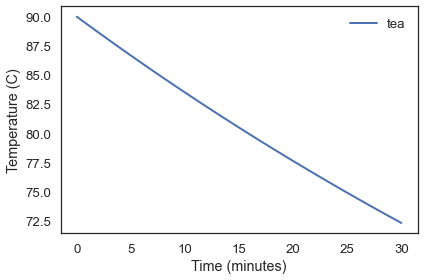

In [360]:
plot(results.T, label='tea')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

最终的温度结果：

In [361]:
tea.T_final = get_last_value(results.T)
T_final = get_last_value(results.T)

72.2996253904031

#### 程序封装 
让我们定义一个初始化函数：

In [362]:
def make_system(T_init, r, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
                   
    return System(init=init,
                  r=r, 
                  volume=volume,
                  temp=T_init,
                  t_0=0, 
                  t_end=t_end, 
                  dt=1,
                  T_env=22)

然后整个程序可以这样运行：

In [363]:
tea = make_system(T_init=90, r=0.01, volume=300, t_end=30)
results = run_simulation(tea, update_func)
T_final = get_last_value(results.T)

72.2996253904031

### 练习
仿真50mL牛奶的温度变化，起始温度为5degC，在一个同样的保温杯里放15分钟，画出结果。
另外通过尝试，找出参数$r$的值，使得最终温度接近20degC。

In [364]:
milk = make_system(T_init=5, r=0.13296079, volume=50, t_end=15)
results = run_simulation(milk, update_func)
T_final = get_last_value(results.T)

20.000000022328933

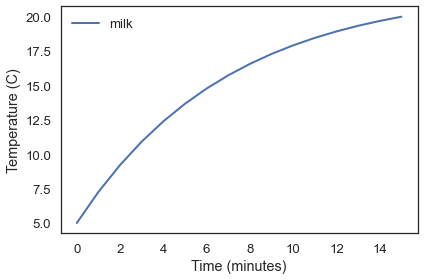

In [365]:
plot(results.T, label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')